<a href="https://colab.research.google.com/github/jspumn/jspumn.github.io/blob/main/%5Battachment_dating_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Marriage Pairing Distribution:
Secure + Secure: 436
Anxious + Avoidant: 343
Avoidant + Secure: 38
Avoidant + Avoidant: 71
Anxious + Anxious: 72
Anxious + Secure: 40


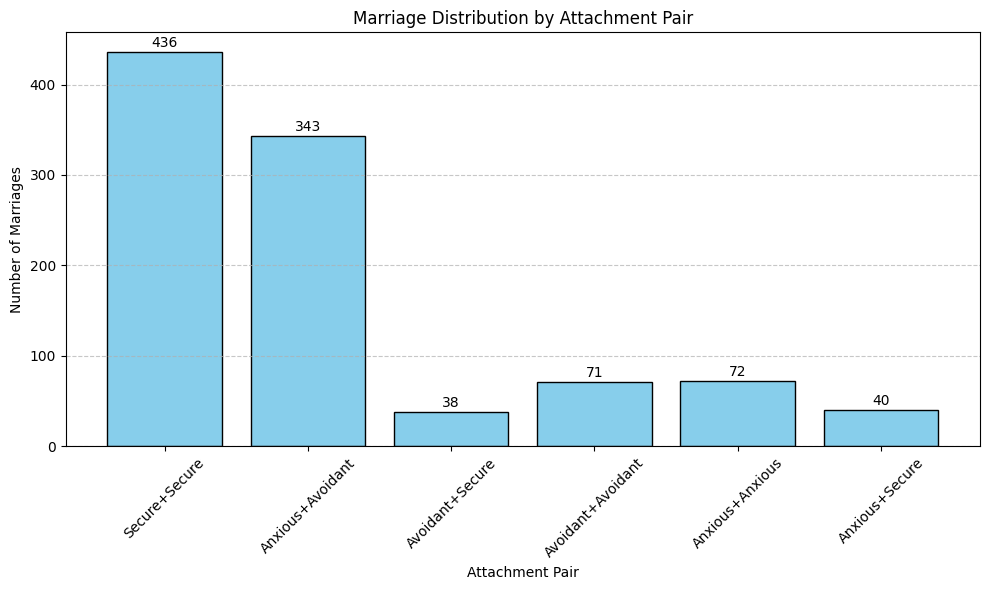

In [2]:
import numpy as np
import random
from collections import Counter
import matplotlib.pyplot as plt

# Define attachment types
attachment_types = ['Secure', 'Anxious', 'Avoidant']
type_index = {t: i for i, t in enumerate(attachment_types)}

# Initial population distribution
initial_distribution = {
    'Secure': 0.5,
    'Anxious': 0.25,
    'Avoidant': 0.25
}

# Population size
POP_SIZE = 1000

# Generate initial population
population = [
    random.choices(attachment_types, weights=[initial_distribution[t] for t in attachment_types])[0]
    for _ in range(POP_SIZE)
]

# Marriage likelihood matrix based on attachment combinations
# Value = relative chance of successful marriage
marriage_weights = {
    ('Secure', 'Secure'): 0.9,
    ('Secure', 'Anxious'): 0.7,
    ('Secure', 'Avoidant'): 0.7,
    ('Anxious', 'Avoidant'): 0.5,
    ('Anxious', 'Anxious'): 0.4,
    ('Avoidant', 'Avoidant'): 0.3
}

# Set default weight if not defined
DEFAULT_MARRIAGE_WEIGHT = 0.2

# Each individual dates 3-5 times, then chooses to marry one partner
MARRIAGE_TRIALS = (3, 5)

# Function to simulate partner selection and marriage outcome
def simulate_marriages(population):
    final_pairings = []
    for i, person in enumerate(population):
        partners = random.sample(range(len(population)), random.randint(*MARRIAGE_TRIALS))
        partner_scores = []
        for j in partners:
            if i == j: continue  # skip self
            p1, p2 = person, population[j]
            pair = tuple(sorted([p1, p2]))
            score = marriage_weights.get(pair, DEFAULT_MARRIAGE_WEIGHT)
            partner_scores.append((score, j))

        if partner_scores:
            # Choose partner with highest marriage success score
            best_partner_idx = max(partner_scores, key=lambda x: x[0])[1]
            final_pairings.append((person, population[best_partner_idx]))
    return final_pairings

# Run simulation
pairings = simulate_marriages(population)

# Count final attachment type combinations
result_counter = Counter(tuple(sorted(pair)) for pair in pairings)

# Display results
print("Final Marriage Pairing Distribution:")
for pair, count in result_counter.items():
    print(f"{pair[0]} + {pair[1]}: {count}")

# Enhanced visualization
pairs = list(result_counter.keys())
counts = list(result_counter.values())
labels = [f"{p1}+{p2}" for p1, p2 in pairs]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.xlabel("Attachment Pair")
plt.ylabel("Number of Marriages")
plt.title("Marriage Distribution by Attachment Pair")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()